---
<center>

  # **Tarea 03**

**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.integrate import quad


In [10]:
def animar_esquema(
        numero_pasos: int, 
        matriz_video: np.ndarray,
        filename: str,
):
    """
    Genera y guarda una animación de la evolución de V usando esquema_prog_prog.

    Parámetros
    ----------
    numero_pasos : int
        Número de pasos de tiempo.
    matriz_video : np.ndarray
        Matriz que contiene las soluciones en cada paso de tiempo.
    filename : str
        Nombre del archivo de salida (GIF).
    """
    # Matriz para guardar los resultados
    V = matriz_video

    # --- Animación ---
    fig, ax = plt.subplots()
    (line,) = ax.plot(V[0, :], lw=2)
    ax.set_ylim(np.min(V), np.max(V))
    ax.grid(True)

    def update(frame):
        line.set_ydata(V[frame, :])
        return (line,)

    ani = FuncAnimation(fig, update, frames=range(numero_pasos + 1), interval=100, blit=True)

    # Guardar como GIF
    gif_name = filename + ".gif"
    ani.save(gif_name, writer=PillowWriter(fps=10))
    plt.close(fig)
    print(f"✅ Animación guardada en {filename}")

    return ani

# 1.

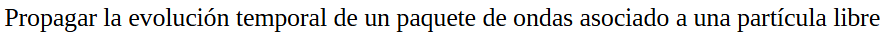

In [11]:
# Constante hbar
#hbar = 1.0545718e-34  # J·s
hbar = 1

# Definición de los parámetros del paquete de ondas
p0 = 8
x0 = -18
sigma = 0.5

# Masa de la particula
m = 1

# Numero de pasos de tiempo y de espacio
N = 200

# Variable espacial
longirud_intervalo = 20
x_prima = np.linspace(-longirud_intervalo, longirud_intervalo, N)

Tenemos que la E.D para una particula libre está dada por:

<center>

$\frac{\partial^2 \psi}{\partial x^2} + \frac{2m}{\hbar^2} E = 0 $

</center>

La evolución temporal va a estar dada por: 

<center>

$ \ket{\psi(t)} = e^{-i\hat{H}(t-t_0)/\hbar} \ket{\psi_0}$

</center>

Desarrollando el Hamiltoniano en sus autofunciones $\hat{H} \ket{\varphi} = E_n \ket{\varphi_n}  $

Con esto tenemos que el operador es:

<center>

$u(t,t_0) = \sum_n \ket{\varphi_n}\bra{\varphi_n} e^{-iE_n (t-t_0)/\hbar}   $

</center>

Donde $p= \pm \sqrt{2mE}$. Encontrando las autofunciones del momento se puede calcular la propagación del paquete de ondas, posteriormente se multiplica por la condición inicial $\psi(x',0)$ y se integra con respecto a $x'$

Para una particula libre el propagador va a ser:

<center>

$u(x,t,x',t') = (\frac{m}{2 \pi \hbar it})^{1/2} e^{im(x-x')^2/2\hbar(t-t_0)} $

</center>

En forma general el propagador queda de la forma:

<center>

$u(x,t,x',t') = \int_{-\infty}^{\infty} \braket{x|\varphi}\braket{\varphi|x} e^{-iE_n(t-t_0)/\hbar} d\varphi $

</center>

En el caso del momento:

<center>

$u(x,t,x',t') = \int_{-\infty}^{\infty} \braket{x|p}\braket{p|x} e^{-ip^2(t-t_0)/2m\hbar} dp$

</center>


Lo primero que hay que realizar es la definición del paquete de ondas. Se va a definir el paquete de ondas como una gaussiana, la cual va a tener la siguiente expresión matemática:

Paquete de ondas: $A e^{-\frac{(x- \mu)^{2}}{2\sigma^2}}$

En donde: 

* $A$: es el valor más alto del paquete de ondas.
* $\mu$: posición central del paquete de ondas, donde se ubica el centro del paquete de ondas.
* $\sigma$: que tan ancho es el paquete de ondas. 

Pauqete de ondas que este localizado en $x_0$ con un momento inicial $p_0$, la expresión matemática va a estar dada por:

<center>

$\frac{1}{\sqrt{2 \pi}\sigma} e^{-\frac{(x-x_0)^2}{2\sigma^2}} e^{i p_0x/\hbar}   $

</center>

In [12]:
def propagador(x, t, x_prima, t_prima, m, hbar):
    """
    Calcula el propagador cuántico para una partícula libre.
    
    Parámetros:
    -----------
    x : float
        Posición final
    t : float
        Tiempo final
    x_prima : float
        Posición inicial
    t_prima : float
        Tiempo inicial (t_0)
    m : float
        Masa de la partícula
    hbar : float
        Constante de Planck reducida (ℏ)
    
    Retorna:
    --------
    complex : Valor del propagador u(x, t, x', t')
    """
    
    # Diferencia temporal
    dt = t - t_prima
    
    if dt <= 0:
        raise ValueError("t debe ser mayor que t_prima")
    
    # Diferencia espacial
    dx = x - x_prima
    
    # Factor de prefactor
    prefactor = (m / (2 * np.pi * hbar * 1j * dt))**(1/2)
    
    # Exponente complejo
    exponente = 1j * m * dx**2 / (2 * hbar * dt)
    
    # Propagador completo
    u = prefactor * np.exp(exponente)
    
    return u


def psi_inicial(x_prima, x0=0, sigma=1, k0=0):
    """
    Paquete de ondas gaussiano inicial.
    
    Parámetros:
    -----------
    x_prima : float o array
        Posición
    x0 : float
        Posición central del paquete
    sigma : float
        Ancho del paquete
    k0 : float
        Momento inicial (en unidades de hbar)
    
    Retorna:
    --------
    complex : ψ(x', 0)
    """
    normalizacion = 1/(np.sqrt(2 * np.pi) * sigma)
    gaussian = np.exp(-(x_prima - x0)**2 / (2 * sigma**2))
    fase = np.exp(1j * k0 * x_prima/hbar)
    
    return normalizacion * gaussian * fase

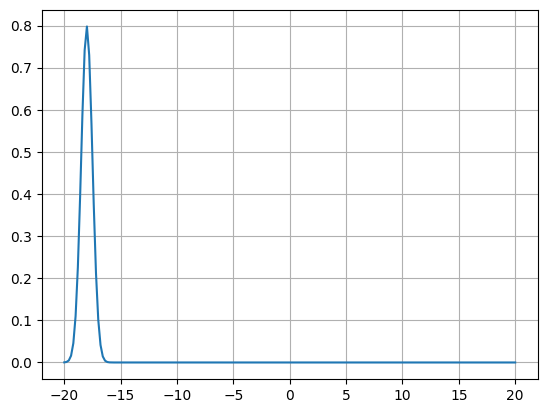

In [13]:
paquete_onda = psi_inicial(x_prima, x0,  sigma, p0)

plt.plot(x_prima, np.abs(paquete_onda))
plt.grid()
plt.show()

Una vez definido el paquete de ondas y el propagador lo único que falta por realiar es la siguiente integral con respecto a $x'$

<center>

$ \psi(x,t) = \int_{-\infty}^{\infty} u(x,t,x',0)\psi(x',0) dx' $

</center>

In [14]:
def evolucion_temporal(x, t, m, hbar, x0=0, sigma=1, k0=0, x_limits=(-50, 50)):
    """
    Calcula ψ(x, t) usando la integral del propagador.
    
    ψ(x, t) = ∫ u(x, t, x', 0) ψ(x', 0) dx'
    
    Parámetros:
    -----------
    x : float
        Posición donde evaluar ψ(x, t)
    t : float
        Tiempo
    m : float
        Masa de la partícula
    hbar : float
        Constante de Planck reducida
    x0 : float
        Posición central inicial del paquete
    sigma : float
        Ancho inicial del paquete
    k0 : float
        Momento inicial
    x_limits : tuple
        Límites de integración
    
    Retorna:
    --------
    complex : ψ(x, t)
    """
    
    def integrando_real(x_prima):
        prop = propagador(x, t, x_prima, 0, m, hbar)
        psi_0 = psi_inicial(x_prima, x0, sigma, k0)
        resultado = prop * psi_0
        return np.real(resultado)
    
    def integrando_imag(x_prima):
        prop = propagador(x, t, x_prima, 0, m, hbar)
        psi_0 = psi_inicial(x_prima, x0, sigma, k0)
        resultado = prop * psi_0
        return np.imag(resultado)
    
    # Integración numérica de partes real e imaginaria
    real_part, _ = quad(integrando_real, x_limits[0], x_limits[1], limit=100)
    imag_part, _ = quad(integrando_imag, x_limits[0], x_limits[1], limit=100)
    
    return real_part + 1j * imag_part

In [41]:
x = np.linspace(-longirud_intervalo, 4*longirud_intervalo, N)
tiempo = np.linspace(1, 8, N)
#tiempo = [0, 5, 10, 20]

# Arreglo para guardar la evolución
evolucion = np.zeros((len(tiempo), len(x)))

In [42]:
for i, t in enumerate(tiempo):
    pos = i
    # Calcular ψ(x, t) para cada posición
    psi_t = []
    for i in x:
        if t == 0:
            psi = psi_inicial(i, x0, sigma, p0)
        else:
            psi = evolucion_temporal(i, t, m, hbar, x0, sigma, p0)
        psi_t.append(psi)
        
    psi_t = np.array(psi_t)
    densidad_prob = np.abs(psi_t)**2
    evolucion[pos, :] = densidad_prob
    

In [43]:
# Animar y guardar el resultado
animar_esquema(len(tiempo)-1, evolucion, "evolucion_paquete_onda_libre")

✅ Animación guardada en evolucion_paquete_onda_libre


# 2.

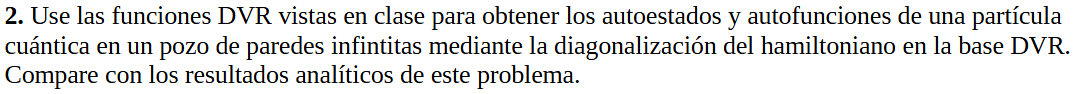

Las funciones DVR propuestas son: 

<center>

$f_n(R) = \frac{2}{\sqrt{L(N_f +1)}} \sum_{k=1}^{N_f} \sin(\frac{ k \pi (R - R_0)}{L}) \sin(\frac{k n \pi}{N_f + 1}) $

</center>

Donde: 

* $N_f$ es el numero de puntos DVR.
* $R_n = \frac{nL}{N_f +1} + R_0$.
* $L$ es el tamaño del intervalo.


Con lo que la función $\psi(R) = \sum_n c_n f_n(R)$

Tenemos que para una partícula cuántica en un pozo de paredes infinitas:

* $E_n = \frac{n^2 \pi^2 \hbar^2}{2 m L^2} $
* $ \varphi_n = \sqrt{\frac{2}{L}} \sin(n \pi x / L)  $

In [ ]:
r0 = 0                          # Valor inicial de r
rmax = 20                       # Valor máximo de r
L = rmax - r0                   # Longitud del intervalo
Ndvr = 200                      # Número de puntos de la función DVR
mu = 1                          # Masa reducida (en unidades atómicas)

In [ ]:
# Definición de las funciones DVR
def dvr_function(R, Nf, L, R0, n):
    """
    Calcula la función fn(R) según la fórmula DVR.
    
    Parámetros:
    -----------
    R : float o array
        Valor(es) de la coordenada R
    Nf : int
        Número de puntos de la cuadrícula (grid points)
    L : float
        Longitud del dominio
    R0 : float
        Punto inicial del dominio
        
    Retorna:
    --------
    float o array
        Valor de la función fn(R)
    """
    # Factor de normalización
    factor = 2 / np.sqrt(L * (Nf + 1))
    
    # Suma sobre k desde 1 hasta Nf
    suma = 0
    for k in range(1, Nf + 1):
        # Primer término: sin(kπ(R-R0)/L)
        primer_sin = np.sin(k * np.pi * (R - R0) / L)
        
        # Segundo término: sin(kπn/(Nf+1))
        segundo_sin = np.sin(k * np.pi * n / (Nf + 1))
        
        suma += primer_sin * segundo_sin
    
    return factor * suma

fn(2) = 3.1107623040580616


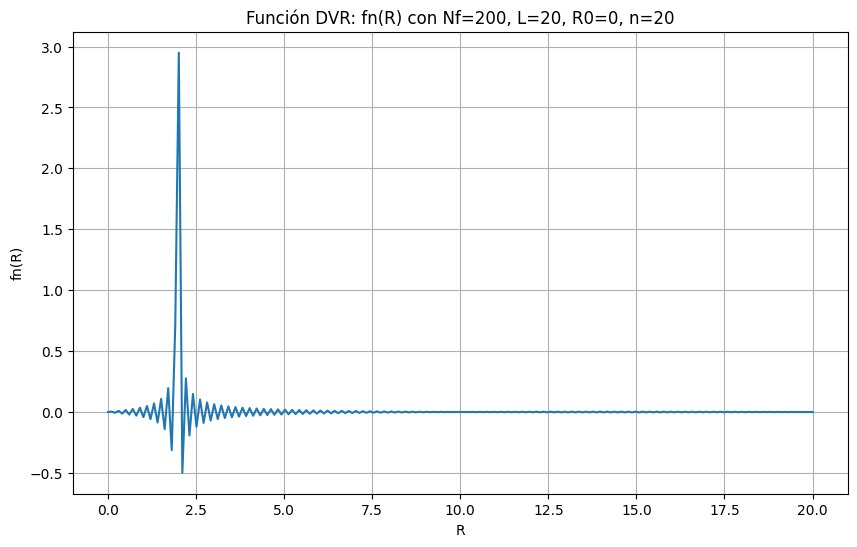

In [ ]:
# Parámetros de ejemplo
n = 20 # Índice n (necesitas definir este valor)
    
# Evaluar en un punto
R_punto = 2
resultado = dvr_function(R_punto, Ndvr, L, r0, n)
print(f"fn({R_punto}) = {resultado}")
    
# Evaluar en un rango de valorer
R_valores = np.linspace(r0, rmax, Ndvr)
resultados = [dvr_function(R, Ndvr, L, r0, n) for R in R_valores]
    
# Graficar (opcional)
plt.figure(figsize=(10, 6))
plt.plot(R_valores, resultados)
plt.xlabel('R')
plt.ylabel('fn(R)')
plt.title(f'Función DVR: fn(R) con Nf={Ndvr}, L={L}, R0={r0}, n={n}')
plt.grid(True)
plt.show()

In [ ]:
Rn = n*L/(Ndvr + 1) + r0

# Mirar si las funciones DVR están normalizadas
integral = 0
for i in range(r0, rmax):
    integral += integral + dvr_function(R=i, Nf=Ndvr, L=L, R0=r0, n=1) * dvr_function(R=i, Nf=Ndvr, L=L, R0=r0, n=1)

print(f"El valor de la integral es: {integral}")

El valor de la integral es: 3.039452061507717


Tenemos que las funcionees DVR cumplen con:


<center>

$\int_{-\infty}^{\infty} f_i \frac{d^2 f_j}{dR^2} dR = \frac{2 \pi^2}{(N_f + 1) L^2} \sum_{k=1}^{N_f} k^2 \sin(\frac{i k \pi}{N_f +1})\sin(\frac{j k \pi}{N_f +1}) $

</center>

Con la anterior propiedad de las funciones DVR se puede calcular la matriz del Hamiltoniano como: 

<center>

$\braket{f_i | \hat{H} | f_j}  = -\frac{\hbar^2}{2m} \braket{f_i | \frac{d^2 f_j}{dx^2}} + \delta_{ij} V(R_i)$

</center>

### Resultados analíticos del pozo de paredes infinitas

# 3.

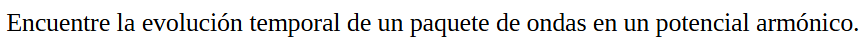

# 4.

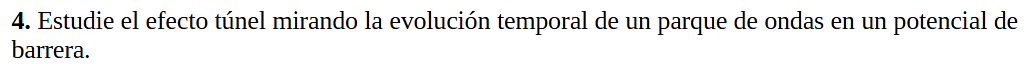